# MILESTONE 1 PHASE 1
`Kevin Boy Gunawan`
<br>

`FTDS-009`

## 1. Introduction

dataset ini berisi informasi-informasi terkait kampanye marketing dari dalah satau institusi bank di portugal. marketing yang dilakukan berbasisi panggilan telepon dimana tujuan akhir atau goal dari institusi ini adalah mengharapkan agar klien melakukan deposit sejumlah dana. keterangan mengenai kolom pada dataset dijelaskan di bawah berikut :

1 - age (numeric)
<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
<br>
**related with the last contact of the current campaign:**
<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')
<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
**other attributes:**
<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
**social and economic context attributes**
<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<br>

**Output variable (desired target):**
<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



**Objective**
<br>
<br>
**Melakukan prediksi apakah client melakukan deposit atau tidak**

## 2. Import Libraries

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [147]:
import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [148]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [149]:
pd.set_option("display.max_columns", 100)

In [150]:
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24830,32,blue-collar,married,basic.9y,no,yes,yes,cellular,nov,tue,295,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
31055,38,technician,married,university.degree,no,yes,yes,cellular,may,wed,121,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
7730,30,self-employed,single,university.degree,no,no,no,telephone,may,fri,510,5,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
25057,32,admin.,single,university.degree,no,no,no,cellular,nov,tue,398,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
31178,48,blue-collar,married,basic.4y,no,no,yes,cellular,may,wed,170,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,44,39,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no
11464,34,admin.,married,university.degree,no,no,no,telephone,jun,fri,64,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
12569,34,blue-collar,married,basic.9y,no,no,no,cellular,jul,mon,136,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
6392,40,blue-collar,married,high.school,unknown,no,no,telephone,may,tue,43,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [152]:
data.duplicated().sum()

12

In [153]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [154]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

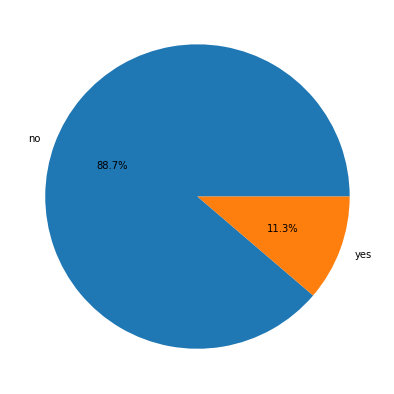

In [155]:
data.groupby('y').size().plot(kind='pie', autopct='%1.1f%%', figsize=(10,7), ylabel='');

dari kesuluruhan data dan infromasi, 11 persen orang memutuskan untuk subscribe dan 88 persen orang tidak. artinya hampir 10 persen saja yang melakukan deposit, ini artinya data imbalance atau timpang disalah satu kelas saja

#### a. Customer Personal Related EDA

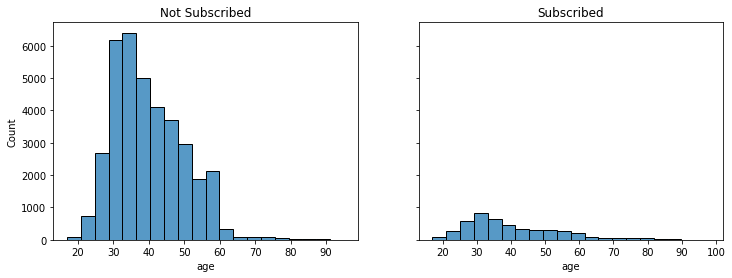

In [156]:
fig, axe = plt.subplots(1,2, figsize=(12,4), sharey=True);

sns.histplot(data[data.y=='no'].age, bins=20, ax=axe[0]);
axe[0].set_title('Not Subscribed');
sns.histplot(data[data.y=='yes'].age, bins=20, ax=axe[1]);
axe[1].set_title('Subscribed');

rata-rata orang yang melakukan deposit maupun tidak berada direntang rata2 umur yang sama yaitu disikiran 30 an

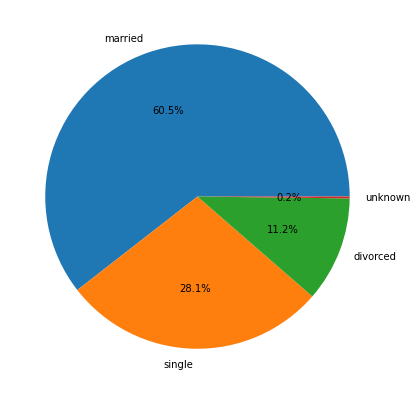

In [157]:
data.marital.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,7), ylabel='');

dapat dilihat bahwa customer dengan status married paling dominan berada di data. dan kita juga akan mudah menduga bahwa status customer yang paling banyak subscribe adalah married mengingat jumlahnya yang timpang dan dominan.

karena jumlah yang timpang tersebut, agar terkesan lebih fair maka penulis berusaha mengurutkan berdasarkan rasio jumlah subscribe dan not subscribe untuk masing-masing status

In [158]:
marital_list = list(data.marital.unique())
frac = []
for i in marital_list:
  pct = data[(data.marital==i) & (data.y=='yes')]['marital'].count() / data[(data.marital==i)]['marital'].count()
  frac.append(pct.round(2))
df_frac = pd.DataFrame({'marital': marital_list, 'frac': frac}).sort_values('frac', ascending=True).reset_index(drop=True)

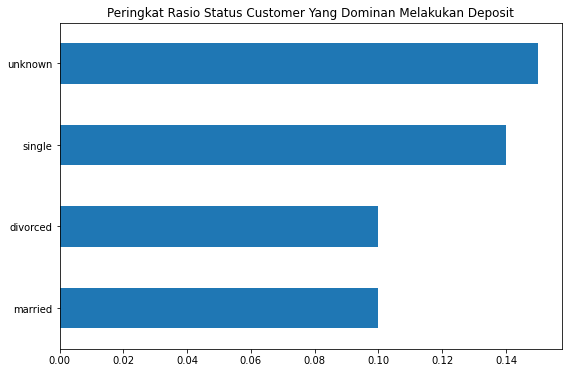

In [159]:
df_frac.plot(kind='barh', x='marital', y='frac', figsize=(9,6), legend=False, xlabel='');
plt.title('Peringkat Rasio Status Customer Yang Dominan Melakukan Deposit');

ternyata selisih rasio dari masing masing status customer tidak terlalu jauh, sehingga rasio ke empatnya dapat dikatan sama saja atau sekitar 10 persen, dalam artian jika ada 100 orang berstatus apapun entah itu married, divorce, single dan unknown sekalipun maka 10 orang diantaranya kemungkingan akan melakukan deposit sedangkan 90 orang sisanya tidak

#### b.  Customer's Job & Education Related EDA

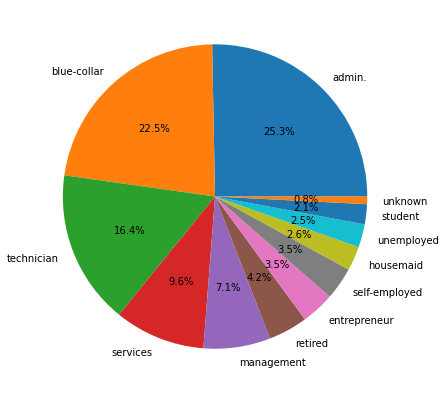

In [160]:
data.job.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,7), ylabel='');

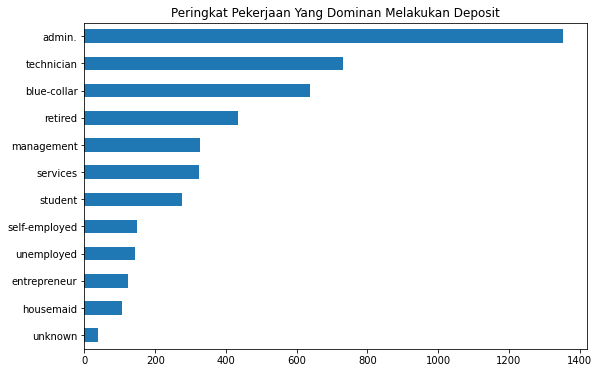

In [161]:
data[data.y=='yes']['job'].value_counts(ascending=True).plot(kind='barh', figsize=(9,6));
plt.title('Peringkat Pekerjaan Yang Dominan Melakukan Deposit');

secara kesuluruhan, admin merupakan jenis pekerjaan customer yang paling dominan dan yang paling banyak juga memutuskan untuk melakukan deposit.

karena jumlah customer dengan pekerjaan admin sangat timpang, maka penulis akan meghitung dan mengurutkan rasio subscribed dan not subscribed untuk masing masing pekerjaan sehingga akan lebih fair.

In [162]:
job_list = list(data.job.unique())
frac = []
for i in job_list:
  pct = data[(data.job==i) & (data.y=='yes')]['job'].count() / data[(data.job==i)]['job'].count()
  frac.append(pct.round(2))
df_frac = pd.DataFrame({'job': job_list, 'frac': frac}).sort_values('frac', ascending=True).reset_index(drop=True)

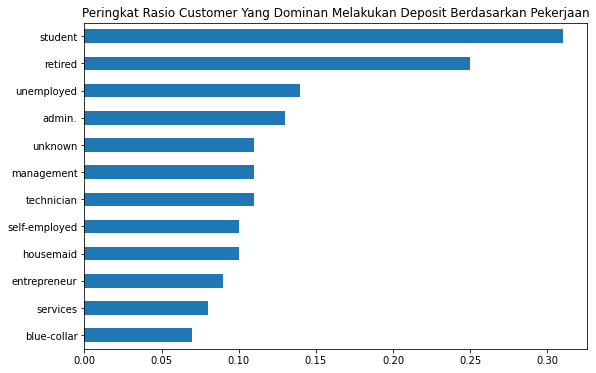

In [163]:
df_frac.plot(kind='barh', x='job', y='frac', figsize=(9,6), legend=False, xlabel='');
plt.title('Peringkat Rasio Customer Yang Dominan Melakukan Deposit Berdasarkan Pekerjaan');

visual diatas menjelaskan peringkat rasio customer untuk masing2 populasi pekerjaan yang telah melakukan deposit. lebih jelasnya, student memiliki rasio subscribe sebesar 0.3, ini memiliki arti bahwa 30 persen dari total golongan cutomer student memutuskan untuk melakukan subscribe dan sisanya tidak.

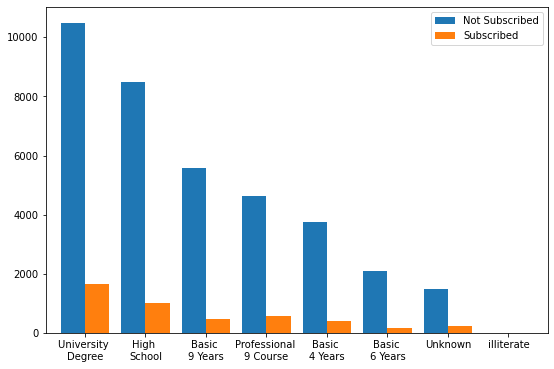

In [164]:
data.groupby('education').y.value_counts().unstack().sort_values(by='no', ascending=False).plot(kind='bar', figsize=(9,6), xlabel='', width=0.8)
plt.legend(['Not Subscribed','Subscribed'])
plt.xticks(np.arange(8), ['University \nDegree', 'High \nSchool', 'Basic \n9 Years','Professional \n9 Course',
                       'Basic \n4 Years','Basic \n6 Years','Unknown','illiterate'], rotation=0);

client di dominasi oleh client bependidikan tingkat universitas

#### c. Customer's Finacial Related EDA

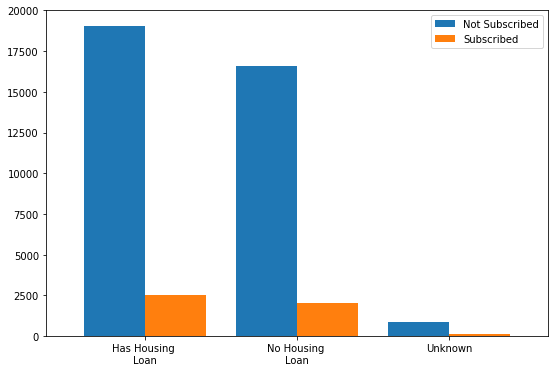

In [165]:
data.groupby('housing').y.value_counts().unstack().sort_values(by='yes', ascending=False).plot(kind='bar', figsize=(9,6), xlabel='', width=0.8);
plt.legend(['Not Subscribed','Subscribed']);
plt.xticks([0, 1, 2], ['Has Housing \nLoan', 'No Housing \nLoan', 'Unknown'], rotation=0);

mayoritas client memiliki kredit perumahan

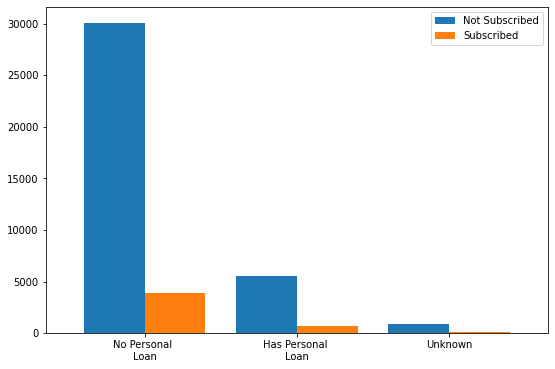

In [166]:
data.groupby('loan').y.value_counts().unstack().sort_values(by='yes', ascending=False).plot(kind='bar', figsize=(9,6), xlabel='', width=0.8);
plt.legend(['Not Subscribed','Subscribed']);
plt.xticks([0, 1, 2], ['No Personal \nLoan', 'Has Personal \nLoan', 'Unknown'], rotation=0);

mayoritas client tidak memiliki kredit atau pinjaman terkait personal loan

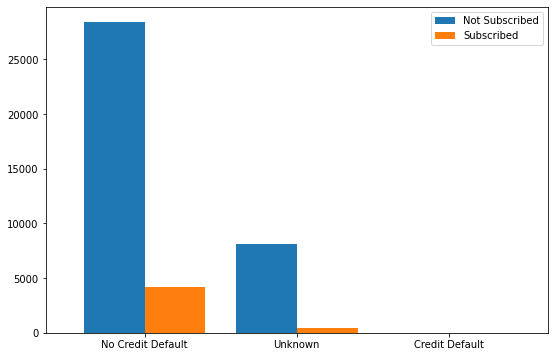

In [167]:
data.groupby('default').y.value_counts().unstack().sort_values(by='yes', ascending=False).plot(kind='bar', figsize=(9,6), xlabel='', width=0.8);
plt.legend(['Not Subscribed','Subscribed']);
plt.xticks([0, 1, 2], ['No Credit Default', 'Unknown', 'Credit Default'], rotation=0);

mayoritas customer tidak memiliki masalah terkait kartu kredit

#### d. Campaign Related EDA

Text(0, 0.5, 'Last Contact Mean Duration')

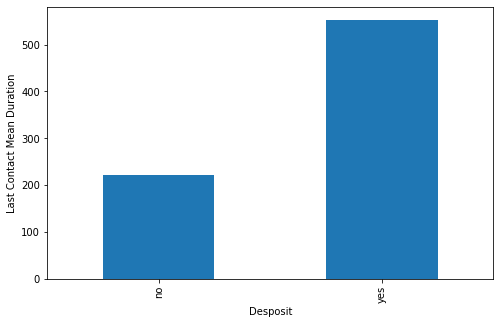

In [168]:
data.groupby('y')['duration'].mean().plot(kind='bar', figsize=(8,5))
plt.xlabel('Desposit')
plt.ylabel('Last Contact Mean Duration')

rata-rata durasi telepon ternyata memiliki pengaruh besar terhadap keputusan client apaka akan deposit atau tidak, terlihat bahwa client yang akhirnya melakukan deposit memiliki rata-rata durasi telepon lebih lama dibanding yang tidak melakukan deposit.

Text(0, 0.5, 'volume')

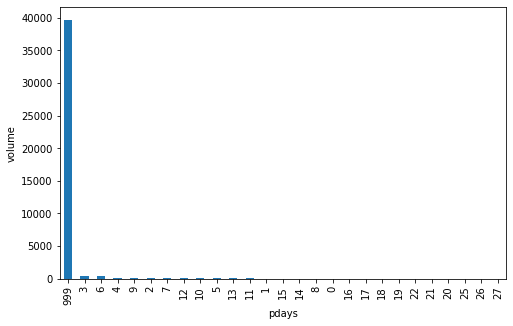

In [169]:
data.groupby('pdays').size().sort_values(ascending=False).plot(kind='bar', figsize=(8,5))
plt.ylabel('volume')

In [170]:
(data.shape[0]-data[data.pdays==999].shape[0])/data.shape[0]*100

3.6782558026609693

pdays merupakan jumlah hari yang telah berlalu setelah kontak terakhir pada campaign sebelumnya. menurut deskripsi data, pdays dengan nilai 999 menunjukan bahwa client belum pernah dikontak sebelumnya. sehingga dapat disimpulkan bahwa hanya 3.67 % persen saja client yang pernah di kontak pada campaign sebelumnya.

In [174]:
num_cols = ['duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

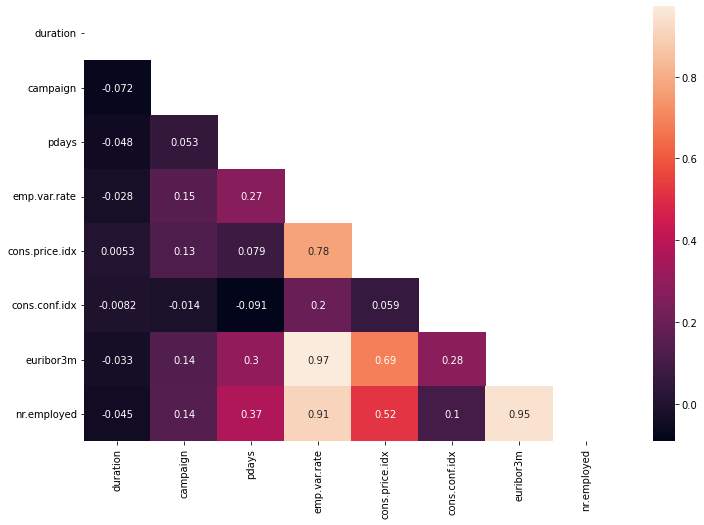

In [175]:
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, mask=np.triu(np.ones_like(data[num_cols].corr())));

* kolom euribor3m dan nr.employed memiliki korelasi yang tinggi dengan kolom emp.var.rate
* kolom emp.var.rate dan euribor3m memiliki korelasi yang tinggi dengan kolom nr.employed
* kolom cons.price.idx memiliki korelasi yang tinggi dengan kolom emp.var.rate yaitu sebesar 0.78

## 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### a. Data Inference

In [176]:
# data_inf = data.sample(10, random_state=0)
# data_inf
data_inf = data[data.y=='yes'].sample(40, random_state=0).append(data[data.y=='no'].sample(50, random_state=0)).sample(15, random_state=0)
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
31400,27,technician,single,university.degree,no,yes,yes,cellular,may,wed,754,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,yes
40594,60,retired,married,university.degree,no,no,no,cellular,sep,thu,799,2,999,0,nonexistent,-1.1,94.199,-37.5,0.884,4963.6,yes
6616,30,technician,single,high.school,no,no,no,telephone,may,wed,438,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
27046,38,admin.,divorced,basic.9y,no,no,no,cellular,nov,fri,71,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
21065,29,technician,single,university.degree,no,yes,no,telephone,aug,thu,234,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
38592,36,self-employed,single,university.degree,no,no,no,cellular,oct,fri,480,1,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
6091,37,blue-collar,single,professional.course,no,no,no,telephone,may,tue,137,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23905,32,admin.,married,university.degree,no,no,no,cellular,aug,fri,133,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
3919,29,technician,married,professional.course,no,yes,no,telephone,may,mon,35,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
10675,44,technician,married,professional.course,no,yes,no,telephone,jun,tue,57,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [177]:
new_data = data.drop(data_inf.index)

### b. Feature selection & manipulation

**manipulasi kolom pdays**

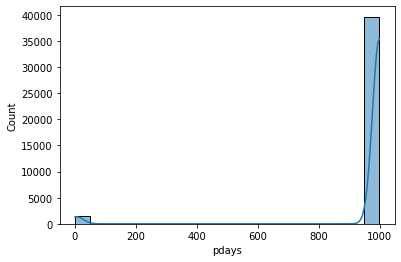

In [178]:
sns.histplot(new_data.pdays,bins=20, kde=True);

kolom pdays sangat skewed dimana pdays dengan nilai 999 paling dominan. pdays sendiri merupakan jumlah hari yang sudah berlalu setelah kontak terakhir pada campaign sebelumnya. pdyas dengan nilai 999 menujukan bahwa client belum pernah melakukan kontak sebelumnya. dari visual diatas menujukan bahwa mayoritas client belum dikontak sebelumnya

penulis berusaha melakukan manipulasi pada data diatas, dimana kolom pdays akan diubah kebentuk kategorikal, dimana pdays=999 akan diberi label 'notcontacted' dan pdays<999 akan diberi label 'contacted'

In [179]:
day = [list(np.arange(999)),[999]]
contact = ['contacted','notcontacted']

In [180]:
for i in range(2):
  new_data = new_data.replace({'pdays': day[i]}, contact[i])

In [181]:
new_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,notcontacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,notcontacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,notcontacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,notcontacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,notcontacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Drop Kolom yang memiliki antar korelasi tinggi**

berdasarkan heatmap pada EDA, kolom-kolom berikut memiliki korelasi yag tinggi dengan kolom yg lain, sehingga dapat melakukan drop salah satu kolom tersebut.

In [182]:
hi_corr = ['euribor3m', 'nr.employed', 'emp.var.rate']

In [183]:
new_data = new_data.drop(columns=hi_corr)
new_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,notcontacted,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,notcontacted,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,notcontacted,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,notcontacted,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,notcontacted,0,nonexistent,93.994,-36.4,no


**Drop Kolom yang kurang relevan**

In [184]:
irelevant = ['contact', 'month', 'day_of_week']

In [185]:
new_data = new_data.drop(columns=irelevant)
new_data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,notcontacted,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,149,1,notcontacted,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,226,1,notcontacted,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,151,1,notcontacted,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,307,1,notcontacted,0,nonexistent,93.994,-36.4,no


### c. Split & Outliers

In [186]:
new_data.sample(10)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
37647,33,admin.,married,high.school,no,no,no,147,1,notcontacted,1,failure,92.201,-31.4,no
39246,38,services,married,high.school,no,yes,no,257,1,notcontacted,0,nonexistent,93.369,-34.8,yes
11788,33,admin.,divorced,university.degree,no,no,no,92,3,notcontacted,0,nonexistent,94.465,-41.8,no
34101,32,technician,married,high.school,no,no,no,195,3,notcontacted,1,failure,92.893,-46.2,no
30116,31,admin.,single,university.degree,no,yes,no,101,2,notcontacted,0,nonexistent,93.075,-47.1,no
38531,32,admin.,single,university.degree,no,no,no,371,1,notcontacted,0,nonexistent,92.431,-26.9,yes
17490,54,management,divorced,professional.course,no,no,no,89,1,notcontacted,0,nonexistent,93.918,-42.7,no
19553,56,admin.,married,basic.6y,unknown,no,no,102,1,notcontacted,0,nonexistent,93.444,-36.1,no
2519,29,blue-collar,married,basic.6y,no,no,yes,60,1,notcontacted,0,nonexistent,93.994,-36.4,no
13359,39,entrepreneur,divorced,basic.4y,no,yes,yes,1317,2,notcontacted,0,nonexistent,93.918,-42.7,no


In [187]:
X = new_data.drop('y', axis=1)
y = new_data['y']

In [188]:
num_values = ['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx']
cat_values = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays', 'poutcome']

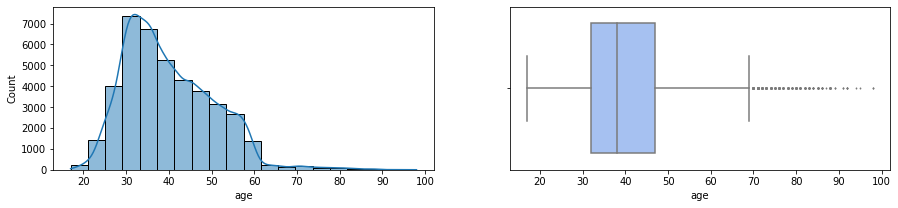

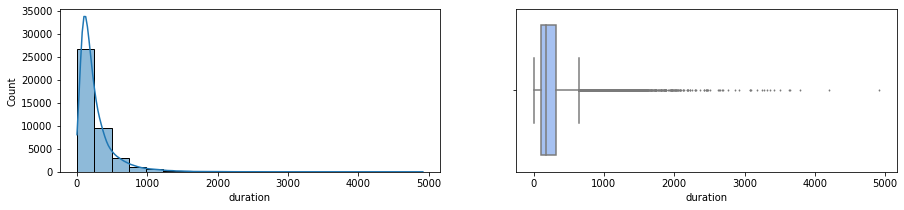

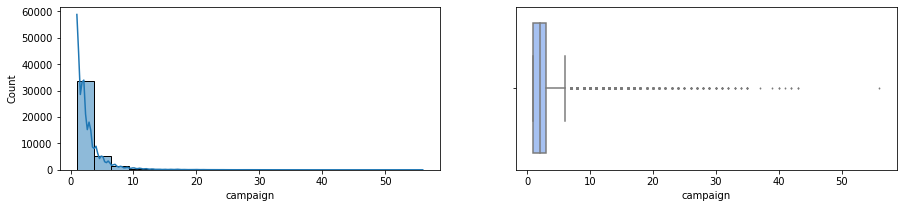

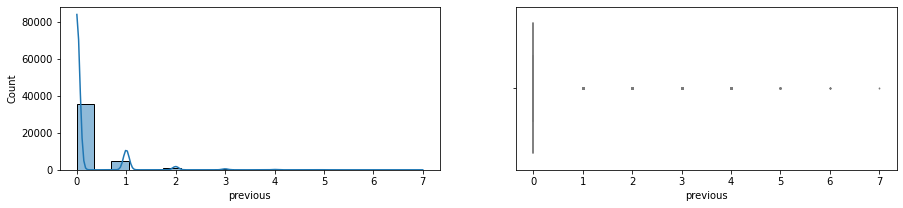

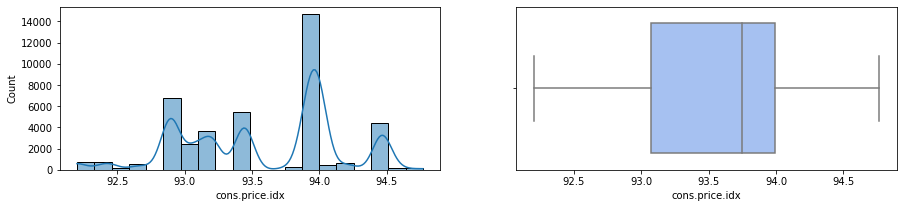

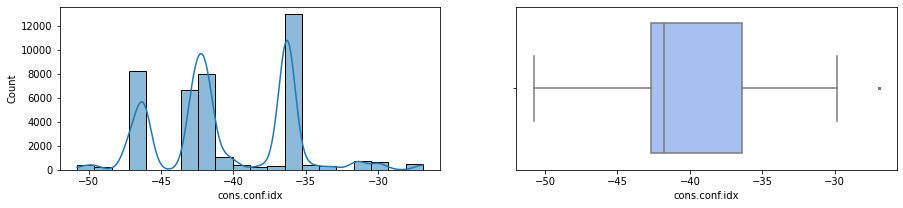

In [189]:
for i in num_values:
  fig, axs = plt.subplots(1,2,figsize=(15, 3))
  sns.histplot(X[i],bins=20, kde=True,ax=axs[0]);
  sns.boxplot(X[i], ax = axs[1], color='#99befd', fliersize=1);

**Log Transformation for skewed duration columns**

In [190]:
X['duration'] = np.log(X['duration']+1)

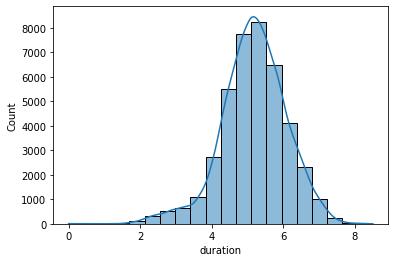

In [191]:
sns.histplot(X['duration'],bins=20, kde=True);

In [192]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [193]:
#fungsi deteksi outliers
def iqr(datas, m):
  q3 = np.percentile(datas, 75)
  q1 = np.percentile(datas, 25)
  bb = q1 - (q3-q1)*m #batas bawah
  ba = q3 + (q3-q1)*m #batas atas
  return bb, ba

**Age Outliers**

In [194]:
bb, ba = iqr(X_trainval.age, 1.5)
bb, ba

(9.5, 69.5)

In [195]:
X_trainval[(X_trainval.age>ba) | (X_trainval.age<bb)].shape[0], X_trainval.shape[0]

(373, 32938)

In [196]:
#presentase outliers
X_trainval[(X_trainval.age>ba) | (X_trainval.age<bb)].shape[0]/X_trainval.shape[0]*100

1.1324306272390552

In [197]:
#Winsorizing
X_trainval['age'] = np.where(X_trainval['age']>ba, ba, 
         np.where(X_trainval['age']<bb, bb, X_trainval['age']))

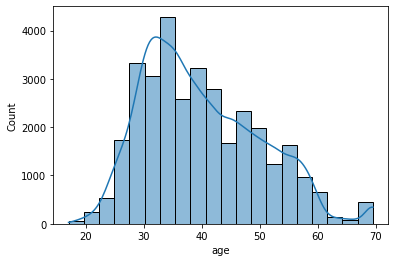

In [198]:
sns.histplot(X_trainval.age, bins=20, kde=True);

**duration outliers**

In [199]:
bb, ba = iqr(X_trainval.duration, 1.5)
bb, ba

(2.929660785879066, 7.476509325480586)

In [200]:
X_trainval[(X_trainval.duration>ba) | (X_trainval.duration<bb)].shape[0], X_trainval.shape[0]

(797, 32938)

In [201]:
#presentase outliers
X_trainval[(X_trainval.duration>ba) | (X_trainval.duration<bb)].shape[0]/X_trainval.shape[0]*100

2.419697613698464

In [202]:
#Winsorizing
X_trainval['duration'] = np.where(X_trainval['duration']>ba, ba, 
         np.where(X_trainval['duration']<bb, bb, X_trainval['duration']))

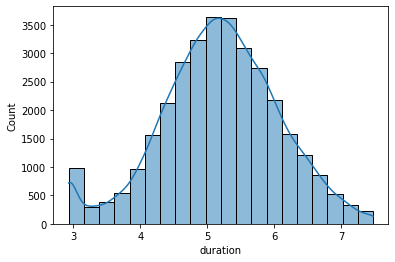

In [203]:
sns.histplot(X_trainval.duration, bins=20, kde=True);

### d. Scaling & encoding

In [204]:
X_trainval_num = X_trainval[num_values]
X_trainval_cat = X_trainval[cat_values]
X_test_num = X_test[num_values]
X_test_cat = X_test[cat_values]

In [205]:
#transformation scaling and encoding Cross validation set
scaler_val = StandardScaler()
X_trainval_num_scaled = scaler_val.fit_transform(X_trainval_num)
X_test_num_scaled = scaler_val.transform(X_test_num)

ohe_val = OneHotEncoder()
X_trainval_cat_enc = ohe_val.fit_transform(X_trainval_cat).toarray()
X_test_cat_enc = ohe_val.transform(X_test_cat).toarray()

In [206]:
X_trainval_all = np.column_stack([X_trainval_num_scaled, X_trainval_cat_enc])
X_test_all = np.column_stack([X_test_num_scaled, X_test_cat_enc])

## 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [207]:
model_lr = LogisticRegression()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()
model_ada = AdaBoostClassifier()

## 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [208]:
#base model
model_rfc.fit(X_trainval_all, y_trainval)

RandomForestClassifier()

## 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### a. Cross Validation

In [209]:
#LOGISTIC REGRESSION
score_lr = cross_val_score(model_lr, X_trainval_all, y_trainval, cv=5, scoring='accuracy')
print(score_lr)
print('mean : ', score_lr.mean())
print('std : ', score_lr.std())

[0.90452338 0.9007286  0.90482696 0.9025353  0.90481251]
mean :  0.9034853475351028
std :  0.0016211753737355396


In [210]:
#DECISION TREE
score_dt = cross_val_score(model_dt, X_trainval_all, y_trainval, cv=5, scoring='accuracy')
print(score_dt)
print('mean : ', score_dt.mean())
print('std : ', score_dt.std())

[0.88979964 0.88494232 0.88479053 0.8919083  0.88416578]
mean :  0.8871213137245088
std :  0.0031306369116866177


In [211]:
#RANDOM FOREST
score_rfc = cross_val_score(model_rfc, X_trainval_all, y_trainval, cv=5, scoring='accuracy')
print(score_rfc)
print('mean : ', score_rfc.mean())
print('std : ', score_rfc.std())

[0.90968427 0.9007286  0.90437158 0.90633065 0.90617884]
mean :  0.9054587889947902
std :  0.0029219878710559557


In [212]:
#KNN
score_knn = cross_val_score(model_knn, X_trainval_all, y_trainval, cv=5, scoring='accuracy')
print(score_knn)
print('mean : ', score_knn.mean())
print('std : ', score_knn.std())

[0.90118397 0.8955677  0.89996964 0.89479277 0.8993472 ]
mean :  0.8981722568297716
std :  0.002525317091571497


In [213]:
#NAIVE BAYES
score_nb = cross_val_score(model_nb, X_trainval_all, y_trainval, cv=5, scoring='accuracy')
print(score_nb)
print('mean : ', score_nb.mean())
print('std : ', score_nb.std())

[0.80631451 0.79614451 0.81086825 0.80324882 0.79201457]
mean :  0.8017181318578507
std :  0.0068178976599517875


In [214]:
#SVM
score_svm = cross_val_score(model_svm, X_trainval_all, y_trainval, cv=5, scoring='accuracy')
print(score_svm)
print('mean : ', score_svm.mean())
print('std : ', score_svm.std())

[0.90604129 0.90224651 0.90482696 0.90344618 0.90344618]
mean :  0.904001423569027
std :  0.0013068177663779006


In [215]:
#ADABOOST
score_ada = cross_val_score(model_ada, X_trainval_all, y_trainval, cv=5, scoring='accuracy')
print(score_ada)
print('mean : ', score_ada.mean())
print('std : ', score_ada.std())

[0.90846995 0.90513054 0.90604129 0.90845605 0.91027782]
mean :  0.9076751285327791
std :  0.0018525625941646917


**Summary**

In [216]:
models = ['LogisticReg', 'DecTree', 'RandForest', 'KNN', 'NaiveBayes', 'SVM', 'AdaBoost']
mean_std = [[score_lr.mean(), score_lr.std()], [score_dt.mean(), score_dt.std()], 
            [score_rfc.mean(), score_rfc.std()], [score_knn.mean(), score_knn.std()], 
            [score_nb.mean(), score_nb.std()], [score_svm.mean(), score_svm.std()], 
            [score_ada.mean(), score_ada.std()]]
pd.DataFrame(mean_std, columns=['mean','std'], index = models).T

,LogisticReg,DecTree,RandForest,KNN,NaiveBayes,SVM,AdaBoost
mean,0.903485,0.887121,0.905459,0.898172,0.801718,0.904001,0.907675
std,0.001621,0.003131,0.002922,0.002525,0.006818,0.001307,0.001853


### b. Best Model

Setelah dilakukan cross validation dengan fold sebanyak 5, ada 4 model yang memiliki performance paling baik dengan skor paling tinggi dan variansi skornya paling minim, model tersebut antara lain logistik regression, random forest, svm, dan adaboost. namun atas dasar efisiensi waktu, penulis akan memilih model random forest untuk selanjutnya akan dilakukan tunning. alasan utama penulis menggunakan model ini adalah model ini lumayan cepat dan akurasinya juga tinggi.

In [217]:
y_pred_test = model_rfc.predict(X_test_all)
print('Mean CV Accuracy Score : ', score_rfc.mean())
print('Test Accuracy Score : ', accuracy_score(y_test, y_pred_test))

Mean CV Accuracy Score :  0.9054587889947902
Test Accuracy Score :  0.9081967213114754


rata-rata score untuk CV dan test menujukan angka yang tidak jauh berbeda, hal ini mengindikasikan bahwa model ini sudah good fit sehingga selanjutnya dapat dilakukan tunning untuk menaikan akurasinya.

### c. Hyperparameter Tunning (GridSearch)

In [218]:
params = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,9)
}
print(params)

{'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])}


In [219]:
rfc = RandomForestClassifier(random_state=0)
rfc_grid = GridSearchCV(rfc, params, cv=10, scoring='accuracy', return_train_score=True)
rfc_grid.fit(X_trainval_all, y_trainval)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8]),
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy')

In [220]:
crit = rfc_grid.cv_results_['param_criterion'].data
min_split = rfc_grid.cv_results_['param_min_samples_split'].data
nestimator = rfc_grid.cv_results_['param_n_estimators'].data
meanscore = rfc_grid.cv_results_['mean_test_score']
fittime = rfc_grid.cv_results_['mean_fit_time']
df_params = pd.DataFrame({'criterion': list(crit),
              'min_samples_split': list(min_split),
              'n_estimator': list(nestimator),
              'mean_score': list(meanscore),
              'fit_time': list(fittime)})

In [221]:
#dataframe untuk masing2 parameter
df_params

,criterion,min_samples_split,n_estimator,mean_score,fit_time
0,gini,2,50,0.906734,1.687577
1,gini,2,100,0.906977,3.441698
2,gini,2,150,0.907098,4.998884
3,gini,3,50,0.907068,1.696091
4,gini,3,100,0.907493,3.240054
5,gini,3,150,0.908252,4.819633
6,gini,4,50,0.909041,1.614830
7,gini,4,100,0.908282,3.172200
8,gini,4,150,0.908555,4.864700
9,gini,5,50,0.907554,1.591949


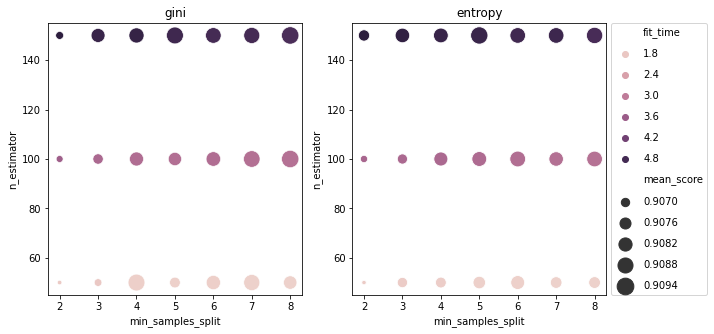

In [222]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x='min_samples_split', y='n_estimator', size='mean_score', sizes = (20,300),
                hue='fit_time', data=df_params[df_params.criterion=='gini'], legend=False, ax=axes[0])
axes[0].set_title('gini')
sns.scatterplot(x='min_samples_split', y='n_estimator', size='mean_score', sizes = (20,300),
                hue='fit_time', data=df_params[df_params.criterion=='entropy'], ax=axes[1])
axes[1].set_title('entropy')
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labelspacing=1.1)

* pada criterion gini, semakin bertambah n_estimator akurasi skor semakin bertambah begitu pula waktu fittingnya juga semakin lama.
* pada criterion gini jumlah min_sample_split yang semakin banyak membuat akurasi skor naik
* pada criterion entropy, sama seperti pada gini dimana semakin bertambah n_estimator akurasi skor juga semakin bertambah begitu pula waktu fittingnya juga semakin lama.
* untuk criterion entropy jumlah min_sample_split sama dengan 5 membuat akurasi skor paling maksimal
<br>
<br>

dugaan awal : baik criterion gini maupun entropi, jika kita menambah jumlah n_estimator maka akurasi skor akan semakin naik.
<br>
<br>
hal ini kemudian penulis buktikan apakah hal ini benar atau salah

In [234]:
params2 = {
    'n_estimators': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340],
    'criterion': ['entropy'],
    'min_samples_split': [5]
}

In [235]:
rfc2 = RandomForestClassifier(random_state=0)
rfc_grid2 = GridSearchCV(rfc2, params2, cv=10, scoring='accuracy', return_train_score=True)
rfc_grid2.fit(X_trainval_all, y_trainval)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy'], 'min_samples_split': [5],
                         'n_estimators': [100, 120, 140, 160, 180, 200, 220,
                                          240, 260, 280, 300, 320, 340]},
             return_train_score=True, scoring='accuracy')

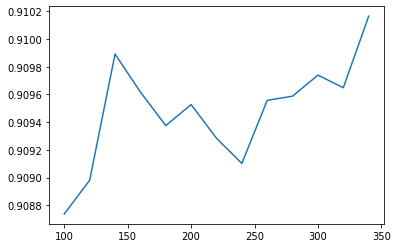

In [236]:
plt.plot(rfc_grid2.cv_results_['param_n_estimators'].data, rfc_grid2.cv_results_['mean_test_score'])

ternyata nilai n_estimator sangat mempengaruhi performansi dari model projek ini. memberikan nilai n_estimator yang tinggi akan membuat performa model menjadi lebih baik. namun tidak semua nilai n_estimator yang tinggi akan membuat performa model lebih baik, sebagai contoh pada n_estimator 150 ternyata memberikan performa lebih baik dibandingkan n_estimator 240. namun karena pertimbangan efisiesni waktu juga diperhitungkan, maka penulis memutuskan bahwa nilai n_estimator 150 adalah yang paling ideal sejauh ini, disamping model dapat perform dengan bagus, waktu training juga tidak terlalu lama dibandingkan saat menggunakan nilai estimator yang tinggi.

maka dalam model ini, parameter terbaik yang sejauh ini dapat ditemukan adalah sebagai berikut :

In [226]:
#Melihat parameter terbaik berdasark searchgridCV
print('best params:', rfc_grid.best_params_)
print('best score:', rfc_grid.best_score_)
print('best estimator:', rfc_grid.best_estimator_)

best params: {'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 150}
best score: 0.9096484216764196
best estimator: RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=150, random_state=0)


In [266]:
#membuat model baru berdasarkan parameter terbaik
rfc_best = rfc_grid.best_estimator_
print(rfc_best)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=150, random_state=0)


In [267]:
#train best model with best hyperparameter
rfc_best.fit(X_trainval_all, y_trainval)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=150, random_state=0)

## 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [268]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
31400,27,technician,single,university.degree,no,yes,yes,cellular,may,wed,754,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,yes
40594,60,retired,married,university.degree,no,no,no,cellular,sep,thu,799,2,999,0,nonexistent,-1.1,94.199,-37.5,0.884,4963.6,yes
6616,30,technician,single,high.school,no,no,no,telephone,may,wed,438,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
27046,38,admin.,divorced,basic.9y,no,no,no,cellular,nov,fri,71,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
21065,29,technician,single,university.degree,no,yes,no,telephone,aug,thu,234,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
38592,36,self-employed,single,university.degree,no,no,no,cellular,oct,fri,480,1,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
6091,37,blue-collar,single,professional.course,no,no,no,telephone,may,tue,137,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23905,32,admin.,married,university.degree,no,no,no,cellular,aug,fri,133,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
3919,29,technician,married,professional.course,no,yes,no,telephone,may,mon,35,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
10675,44,technician,married,professional.course,no,yes,no,telephone,jun,tue,57,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [269]:
#drop kolom
data_inf2 = data_inf.drop(hi_corr+irelevant, axis=1)

#manipulasi kolom pdays
for i in range(2):
  data_inf2 = data_inf2.replace({'pdays': day[i]}, contact[i])

#transform log kolom duration
data_inf2['duration'] = np.log(data_inf2['duration']+1)

data_inf2.head(15)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
31400,27,technician,single,university.degree,no,yes,yes,6.626718,1,notcontacted,0,nonexistent,92.893,-46.2,yes
40594,60,retired,married,university.degree,no,no,no,6.684612,2,notcontacted,0,nonexistent,94.199,-37.5,yes
6616,30,technician,single,high.school,no,no,no,6.084499,1,notcontacted,0,nonexistent,93.994,-36.4,no
27046,38,admin.,divorced,basic.9y,no,no,no,4.276666,1,notcontacted,0,nonexistent,93.200,-42.0,no
21065,29,technician,single,university.degree,no,yes,no,5.459586,3,notcontacted,0,nonexistent,93.444,-36.1,no
38592,36,self-employed,single,university.degree,no,no,no,6.175867,1,notcontacted,0,nonexistent,92.431,-26.9,yes
6091,37,blue-collar,single,professional.course,no,no,no,4.927254,2,notcontacted,0,nonexistent,93.994,-36.4,no
23905,32,admin.,married,university.degree,no,no,no,4.897840,2,notcontacted,0,nonexistent,93.444,-36.1,no
3919,29,technician,married,professional.course,no,yes,no,3.583519,1,notcontacted,0,nonexistent,93.994,-36.4,no
10675,44,technician,married,professional.course,no,yes,no,4.060443,2,notcontacted,0,nonexistent,94.465,-41.8,no


In [270]:
data_inf2 = data_inf2.drop(columns=['y'])


#seperate columns
datainf_num = data_inf2[num_values]
datainf_cat = data_inf2[cat_values]

#encode and scale
datainf_num_scaled = scaler_val.transform(datainf_num)
datainf_cat_enc = ohe_val.transform(datainf_cat).toarray()

datainf_all = np.column_stack([datainf_num_scaled, datainf_cat_enc])

In [271]:
#melakukan prediksi data inference
y_pred_best = model_rfc.predict(datainf_all)

In [272]:
#dataframe hasil prediksi vs hasil yang sebenarnya dari data inference
real_pred = pd.DataFrame({'real': list(data_inf['y']), 'prediction': list(y_pred_best)})
real_pred

,real,prediction
0,yes,no
1,yes,yes
2,no,no
3,no,no
4,no,no
5,yes,yes
6,no,no
7,no,no
8,no,no
9,no,no


dari 15 sample yang diambil secara acak yang mana model belum pernah dikenalkan dengan data ini sebelumnya, sejauh ini model dapat memprediksi benar 14 buah entri data. sehingga pada tahap inference ini, model berhasil menebak dengan akurasi 14/15 = 0.933 atau 93.3 %

## 10. Pengambilan Kesimpulan

* setelah dilakukan cross validation dari 7 model, empat model diantaranya yaitu SVM, logistic regression, random forest dan adaboost menujukan performa yang bagus yaitu dengan menghasilkan akurasi skor diatas 90
* dari 4 model yang memiliki performa bagus tersbut, kemudian dipilih model random forest untuk selanjutnya dilakukan tunning dan dengan menggunakan gridsearchCV ditemukan model terbaiknya adalah dengan menggunakan hyperparameter criterion entropy, min_sample_split=5, dan n_estimators=150.
* dari data inference yang diberikan dengan jumlah 15 baris data baru, model ini dapat memprediksi 14 data dengan benar.